In [73]:
#import the libraries that we use in file
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#read the file
df=pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
#make data frame
val=pd.DataFrame(df.isnull().sum())
val

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [78]:
#changed the columns name
val=val.reset_index()
val=val.rename(columns={"index":"variables",0:"missing_values"})
val

,variables,missing_values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [79]:
#convert into percentage of missing_values on another column
val['missing_percentage']=(val["missing_values"]/len(df))*100
val

,variables,missing_values,missing_percentage
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,19.865320
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


In [87]:
#sorting
val=val.sort_values('missing_percentage',ascending=False).reset_index(drop=True)
val

,variables,missing_values,missing_percentage
0,Cabin,687,77.104377
1,Age,177,19.865320
2,Embarked,2,0.224467
3,PassengerId,0,0.000000
4,Survived,0,0.000000
5,Pclass,0,0.000000
6,Name,0,0.000000
7,Sex,0,0.000000
8,SibSp,0,0.000000
9,Parch,0,0.000000


In [88]:
#now we work on single column
val2=df['Age']
val2

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [92]:
#missing value check
val2=df['Age'].isnull().sum()
val2

177

In [93]:
# see the describe
val2=df["Age"].describe()
val2

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
#remove missing values
val2=df[['Age']]
val2.dropna(inplace=True)

C:\Users\KUNAL RAJPUT\AppData\Local\Temp\ipykernel_12328\3733470576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val2.dropna(inplace=True)


In [96]:
val2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [98]:
#checking the missing values
val2.isnull().sum()

Age    0
dtype: int64

<Axes: >

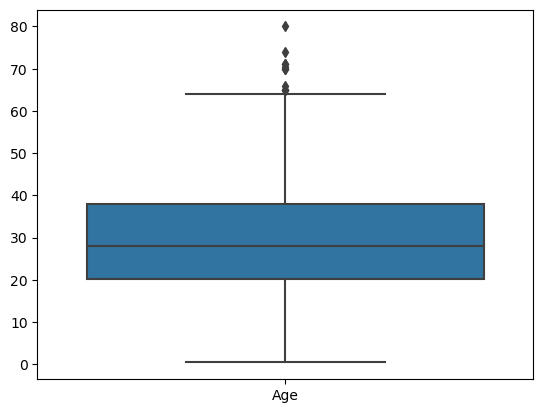

In [99]:
sns.boxplot(val2)

In [101]:
#now we remove outlier
q75, q25=np.percentile(val2,[75,25])
q75, q25

(38.0, 20.125)

In [102]:
IQR=q75-q25
IQR

17.875

In [103]:
q0=q25-(IQR*1.5)
q100=q75+(IQR*1.5)
q0,q100

(-6.6875, 64.8125)

In [104]:
val2=val2[(val2>=q0) & (val2<=q100)]

<Axes: >

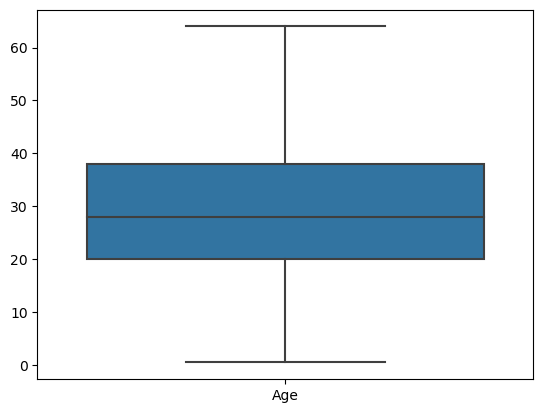

In [105]:
sns.boxplot(val2)

In [106]:
val2.describe()

,Age
count,703.000000
mean,29.072077
std,13.728478
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,64.000000


In [112]:
val2.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [107]:
val2.mean()

Age    29.072077
dtype: float64

In [108]:
val2.median()

Age    28.0
dtype: float64

In [115]:
val2.mode().iloc[0,0]

24.0

# KNN imputation

In [122]:
from sklearn.impute import KNNImputer
import pandas as pd

In [127]:
data={"feature1":[2,3,4,None],
      "feature2":[None,4,3,None],
      "feature3":[2,3,4,1],
      "feature4":[8,None,None,None]
            } 
df=pd.DataFrame(data)
display("before imputation",df)

'before imputation'

,feature1,feature2,feature3,feature4
0,2.0,NaN,2,8.0
1,3.0,4.0,3,NaN
2,4.0,3.0,4,NaN
3,NaN,NaN,1,NaN


In [130]:
imputer=KNNImputer(n_neighbors=2)
imputed_data=imputer.fit_transform(df)
imputed_df=pd.DataFrame(imputed_data,columns=df.columns)
display("imputed_data",imputed_df)

'imputed_data'

,feature1,feature2,feature3,feature4
0,2.0,3.5,2.0,8.0
1,3.0,4.0,3.0,8.0
2,4.0,3.0,4.0,8.0
3,2.5,3.5,1.0,8.0
